<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Collecting Job Data Using APIs**


Estimated time needed: **45 to 60** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data from GitHub Jobs API
*   Store the collected data into an excel spreadsheet.


><strong>Note: Before starting with the assignment make sure to read all the instructions and then move ahead with the coding part.</strong>


#### Instructions


To run the actual lab, firstly you need to click on the [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) notebook link. The file contains flask code which is required to run the Jobs API data.

Now, to run the code in the file that opens up follow the below steps.

Step1: Download the file. 

Step2: Upload it on the IBM Watson studio. (If IBM Watson Cloud service does not work in your system, follow the alternate Step 2 below)

Step2(alternate): Upload it in your SN labs environment using the upload button which is highlighted in red in the image below:
Remember to upload this Jobs_API file in the same folder as your current .ipynb file

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Upload.PNG">

Step3:  Run all the cells of the Jobs_API file. (Even if you receive an asterik sign after running the last cell, the code works fine.)

If you want to learn more about flask, which is optional, you can click on this link [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/FLASK_API.md.html).

Once you run the flask code, you can start with your assignment.


## Dataset Used in this Assignment

The dataset used in this lab comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a **Public Domain license**.

> Note: We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [2]:
import requests # you need this module to make an API call
import pandas as pd

# Define the API URL
api_url = "http://api.open-notify.org/astros.json"

# Make a GET request to fetch the data
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    print(data)
else:
    print("Failed to retrieve data:", response.status_code)

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


Print the number of astronauts currently on ISS.


In [3]:
print(data.get('number'))

12


Print the names of the astronauts currently on ISS.


In [4]:
astronauts = data.get('people')
print("There are {} astronauts on ISS".format(len(astronauts)))
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 12 astronauts on ISS
And their names are :
Oleg Kononenko
Nikolai Chub
Tracy Caldwell Dyson
Matthew Dominick
Michael Barratt
Jeanette Epps
Alexander Grebenkin
Butch Wilmore
Sunita Williams
Li Guangsu
Li Cong
Ye Guangfu


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using GitHub Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


#### Write a function to get the number of jobs for the Python technology.<br>
> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title
 
 * Job Experience Required
 
 * Key Skills
 
 * Role Category
 
 * Location
 
 * Functional Area
 
 * Industry
 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.



In [26]:
import requests

# URL for the jobs.json file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

# Download the file
response = requests.get(url)

# Save the file locally
with open('jobs.json', 'wb') as file:
    file.write(response.content)

print("jobs.json file downloaded successfully.")

jobs.json file downloaded successfully.


In [27]:
import json

# Load the JSON data from the file
with open('jobs.json', 'r') as file:
    job_data = json.load(file)

# Check if data is loaded
print(f"Loaded {len(job_data)} job postings.")
if job_data:
    print("Sample job entry:", job_data[0])
else:
    print("No job data available.")
missing_location_count = 0
for location in locations:
    jobs_for_location = []
    for job in job_data:
        if 'location' in job:
            if location.lower() in job['location'].lower():
                jobs_for_location.append(job)
        else:
            missing_location_count += 1
    print(f"Processing {location}: Found {len(jobs_for_location)} jobs.")

print(f"Number of entries missing 'location' key: {missing_location_count}")
for i, job in enumerate(job_data[:5]):  # Print the first 5 entries
    print(f"Job {i}: {job}")

Loaded 27005 job postings.
Sample job entry: {'Id': 0, 'Job Title': 'Digital Media Planner', 'Job Experience Required': '5 - 10 yrs', 'Key Skills': 'Media Planning| Digital Media', 'Role Category': 'Advertising', 'Location': 'Los Angeles', 'Functional Area': 'Marketing , Advertising , MR , PR , Media Planning', 'Industry': 'Advertising, PR, MR, Event Management', 'Role': 'Media Planning Executive/Manager'}


NameError: name 'locations' is not defined

Calling the function for Python and checking if it works.


In [30]:
def get_number_of_python_jobs(job_data):
    # Filter jobs by the 'Key Skills' field for 'Python'
    python_jobs = [job for job in job_data if 'Key Skills' in job and 'python' in job['Key Skills'].lower()]
    
    # Return the number of Python jobs found
    return len(python_jobs)

# Example usage
number_of_python_jobs = get_number_of_python_jobs(job_data)
print(f"There are {number_of_python_jobs} job postings for Python technology.")

There are 1173 job postings for Python technology.


In [31]:
def get_number_of_jobs_T(technology):
    # Filter jobs by the 'Key Skills' field for the specified technology
    jobs_for_technology = [job for job in job_data if 'Key Skills' in job and technology.lower() in job['Key Skills'].lower()]
    
    # Return the number of jobs found for the technology
    return len(jobs_for_technology)

# Example usage for JavaScript
number_of_javascript_jobs = get_number_of_jobs_T("JavaScript")
print(f"There are {number_of_javascript_jobs} job postings for JavaScript technology.")

There are 2248 job postings for JavaScript technology.


In [32]:
def get_number_of_jobs_T(technology):
    # Filter jobs by the 'Key Skills' field for the specified technology
    jobs_for_technology = [job for job in job_data if 'Key Skills' in job and technology.lower() in job['Key Skills'].lower()]
    
    # Return the number of jobs found for the technology
    return len(jobs_for_technology)

# Example usage for R
number_of_r_jobs = get_number_of_jobs_T("R")
print(f"There are {number_of_r_jobs} job postings for R technology.")

There are 25744 job postings for R technology.


In [33]:
def get_number_of_jobs_T(technology):
    # Filter jobs by the 'Key Skills' field for the specified technology
    jobs_for_technology = [job for job in job_data if 'Key Skills' in job and technology.lower() in job['Key Skills'].lower()]
    
    # Return the number of jobs found for the technology
    return len(jobs_for_technology)

# Example usage for SQL
number_of_sql_jobs = get_number_of_jobs_T("SQL")
print(f"There are {number_of_sql_jobs} job postings for SQL technology.")

There are 3221 job postings for SQL technology.


In [34]:
def get_number_of_jobs_T(technology):
    # Filter jobs by the 'Key Skills' field for the specified technology
    jobs_for_technology = [job for job in job_data if 'Key Skills' in job and technology.lower() in job['Key Skills'].lower()]
    
    # Return the number of jobs found for the technology
    return len(jobs_for_technology)

# Example usage for Java
number_of_java_jobs = get_number_of_jobs_T("Java")
print(f"There are {number_of_java_jobs} job postings for Java technology.")

There are 3428 job postings for Java technology.


#### Write a function to find number of jobs in US for a location of your choice


In [35]:
def get_number_of_jobs_for_location(location):
    # Filter jobs by the 'Location' field for the specified location
    jobs_for_location = [job for job in job_data if 'Location' in job and location.lower() in job['Location'].lower()]
    
    # Return the number of jobs found for the location
    return len(jobs_for_location)

# Example usage for a specific location, e.g., Los Angeles
number_of_jobs_in_la = get_number_of_jobs_for_location("Los Angeles")
print(f"There are {number_of_jobs_in_la} job postings in Los Angeles.")

There are 640 job postings in Los Angeles.


In [36]:
def get_number_of_jobs_for_location(location):
    # Filter jobs by the 'Location' field for the specified location
    jobs_for_location = [job for job in job_data if 'Location' in job and location.lower() in job['Location'].lower()]
    
    # Return the number of jobs found for the location
    return len(jobs_for_location)

# Example usage for a specific location, e.g., Los Angeles
number_of_jobs_in_ny = get_number_of_jobs_for_location("New York")
print(f"There are {number_of_jobs_in_ny} job postings in New York.")

There are 3226 job postings in New York.


In [37]:
def get_number_of_jobs_for_location(location):
    # Filter jobs by the 'Location' field for the specified location
    jobs_for_location = [job for job in job_data if 'Location' in job and location.lower() in job['Location'].lower()]
    
    # Return the number of jobs found for the location
    return len(jobs_for_location)

# Example usage for a specific location, e.g., Los Angeles
number_of_jobs_in_sf = get_number_of_jobs_for_location("San Francisco")
print(f"There are {number_of_jobs_in_sf} job postings in San Francisco.")

There are 435 job postings in San Francisco.


In [38]:
def get_number_of_jobs_for_location(location):
    # Filter jobs by the 'Location' field for the specified location
    jobs_for_location = [job for job in job_data if 'Location' in job and location.lower() in job['Location'].lower()]
    
    # Return the number of jobs found for the location
    return len(jobs_for_location)

# Example usage for a specific location, e.g., Los Angeles
number_of_jobs_in_wasdc = get_number_of_jobs_for_location("Washington DC")
print(f"There are {number_of_jobs_in_wasdc} job postings in Washington DC.")

There are 5316 job postings in Washington DC.


Call the function for Los Angeles and check if it is working.


In [63]:
def get_number_of_jobs_for_location(location):
    # Filter jobs by the 'Location' field for the specified location
    jobs_for_location = [job for job in job_data if 'Location' in job and location.lower() in job['Location'].lower()]
    
    # Return the number of jobs found for the location
    return len(jobs_for_location)

# Example usage for a specific location, e.g., Los Angeles
number_of_jobs_in_seattle = get_number_of_jobs_for_location("Seattle")
print(f"There are {number_of_jobs_in_seattle} job postings in Seattle.")

There are 3375 job postings in Seattle.


In [39]:
def get_number_of_jobs_for_location(location):
    # Filter jobs by the 'Location' field for the specified location
    jobs_for_location = [job for job in job_data if 'Location' in job and location.lower() in job['Location'].lower()]
    
    # Return the number of jobs found for the location
    return len(jobs_for_location)

# Example usage for a specific location, e.g., Los Angeles
number_of_jobs_in_austin = get_number_of_jobs_for_location("Austin")
print(f"There are {number_of_jobs_in_austin} job postings in Austin .")

There are 434 job postings in Austin .


In [45]:
def get_number_of_jobs_for_location(location):
    # Filter jobs by the 'Location' field for the specified location
    jobs_for_location = [job for job in job_data if 'Location' in job and location.lower() in job['Location'].lower()]
    
    # Return the number of jobs found for the location
    return len(jobs_for_location)

# Example usage for a specific location, e.g., Los Angeles
number_of_jobs_in_detroit = get_number_of_jobs_for_location("Detroit")
print(f"There are {number_of_jobs_in_detroit} job postings in Detroit .")

There are 3945 job postings in Detroit .


### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


In [46]:
!pip install openpyxl
import pandas as pd

# List of technologies you want to check
technologies = ["JavaScript", "Java", "SQL", "R", "Python"]

# Dictionary to store the results
results = {}

# Collecting data for each technology
for tech in technologies:
    number_of_jobs = get_number_of_jobs_T(tech)
    results[tech] = number_of_jobs

# Create a DataFrame from the results
df = pd.DataFrame(list(results.items()), columns=["Technology", "Number of Jobs"])

# Write the DataFrame to an Excel file
df.to_excel("job_postings.xlsx", index=False)

print("Results have been written to job_postings.xlsx")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 25.0 MB/s eta 0:00:00
Results have been written to job_postings.xlsx


Create a python list of all technologies for which you need to find the number of jobs postings.


Import libraries required to create excel spreadsheet


Create a workbook and select the active worksheet


In [ ]:
# your code goes here

Find the number of jobs postings for each of the technology in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [ ]:
#your code goes here

Save into an excel spreadsheet named 'github-job-postings.xlsx'.


#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [47]:
# your code goes here
import pandas as pd

# List of all technologies you want to check
technologies = [
    "C", "C#", "C++", "Java", "JavaScript", "Python", "Scala",
    "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"
]

# Dictionary to store the results
results = {}

# Collecting data for each technology
for tech in technologies:
    number_of_jobs = get_number_of_jobs_T(tech)  # Ensure this function is defined
    results[tech] = number_of_jobs

# Create a DataFrame from the results
df = pd.DataFrame(list(results.items()), columns=["Technology", "Number of Jobs"])

# Write the DataFrame to an Excel file
df.to_excel("job_postings.xlsx", index=False)

print("Results have been written to job_postings.xlsx")


Results have been written to job_postings.xlsx


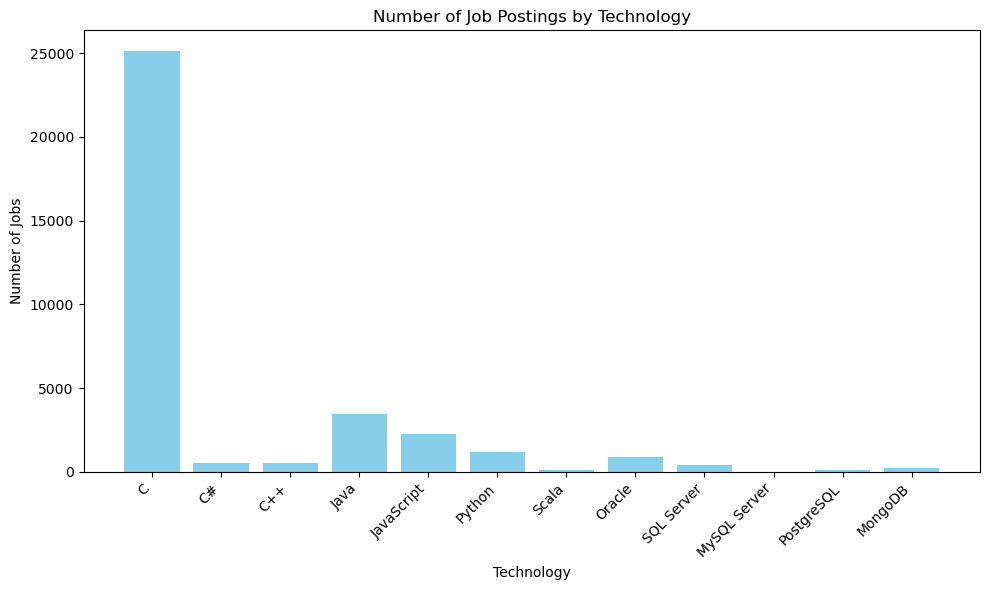

In [48]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the technologies and job counts
# Example DataFrame creation if needed:
# df = pd.DataFrame(list(results.items()), columns=["Technology", "Number of Jobs"])

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(df['Technology'], df['Number of Jobs'], color='skyblue')  # Create a bar chart

# Adding titles and labels
plt.title('Number of Job Postings by Technology')
plt.xlabel('Technology')
plt.ylabel('Number of Jobs')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()


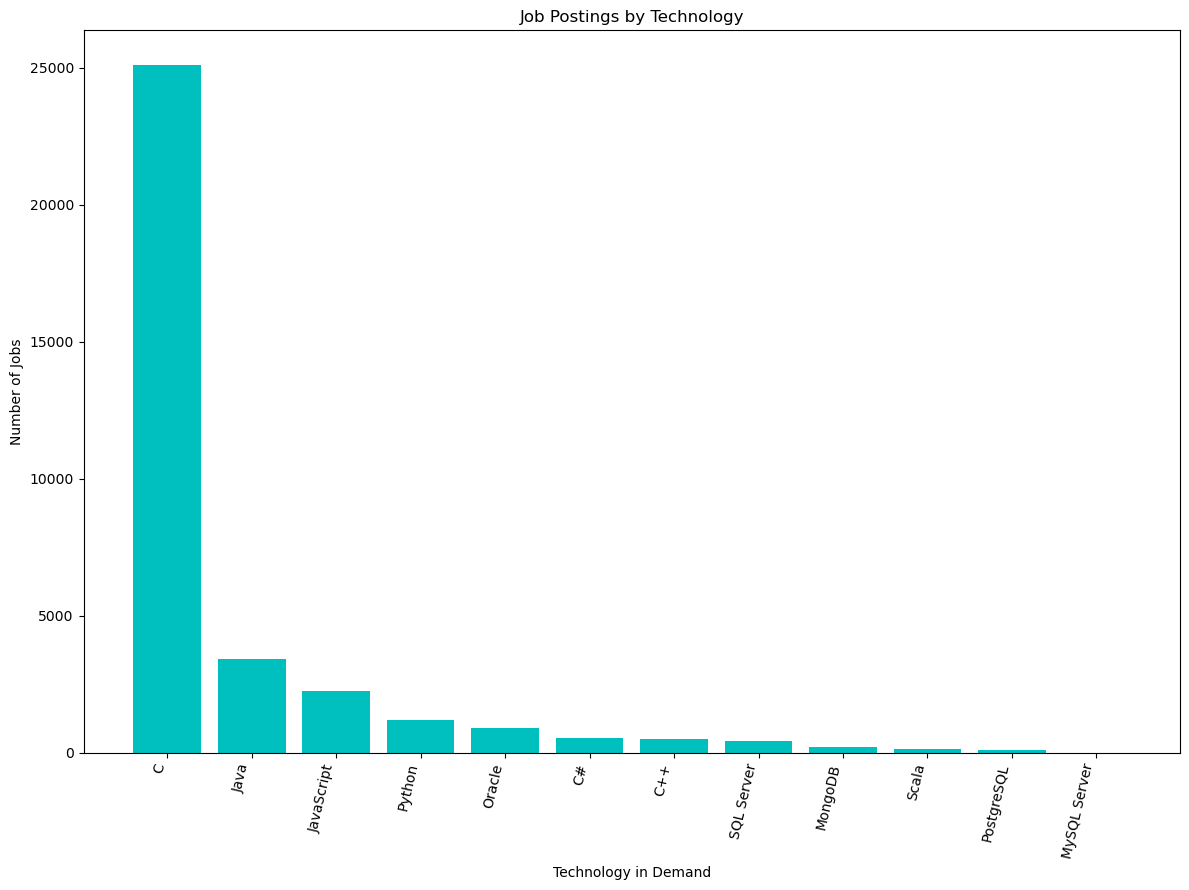

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the technologies and job counts
# Example DataFrame creation if needed:
# df = pd.DataFrame(list(results.items()), columns=["Technology", "Number of Jobs"])

# Sort the DataFrame in descending order by the 'Number of Jobs' column
df_sorted = df.sort_values(by='Number of Jobs', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 9))  # Set the figure size
plt.bar(df_sorted['Technology'], df_sorted['Number of Jobs'], color='c')  # Create a bar chart

# Adding titles and labels
plt.title('Job Postings by Technology')
plt.xlabel('Technology in Demand')
plt.ylabel('Number of Jobs')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=77, ha='right')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated labels
plt.show()

## Authors


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
